In [2]:
import ast
import csv
import os
from pathlib import Path
import ray
import time
import time
import numpy as np
import yastn.tn.mps as mps
import yastn.tn.fpeps as peps
import yastn
from routines import NSpin12, map_hex, gates_from_HH, gates_from_HH2, measure_H_ctm, measure_H_mps
from itertools import product


In [3]:
gs = {'torino': -196, 'fez': -246, 'kyiv': -194}
Nspins = {"kyiv": 127, "torino": 133, "fez": 156}

In [19]:
qpu = 'torino'
#
fname = f"./problems/transfer_Hamiltonian_ibm_{qpu}_0.pkl"
data = np.load(fname, allow_pickle=True)
HC = data["H"]
HM = {(n,): 1 for n in range(Nspins[qpu])}
#
ops = yastn.operators.Spin12(sym='dense')
#
HI = mps.product_mpo(ops.I(), N=Nspins[qpu])

Z, X = ops.z(), ops.x()

termsZZ = [mps.Hterm(amplitude=v,
                     positions=k,
                     operators=[Z] * len(k)) for k, v in HC.items()]
HZZ = mps.generate_mpo(HI, termsZZ)

termsX = [mps.Hterm(amplitude=-1,
                     positions=n,
                     operators=[X]) for n in range(Nspins[qpu])]
HX = mps.generate_mpo(HI, termsX)

psi0 = mps.random_mps(HI, D_total=16)  # initialize with D=16
psi1 = mps.random_mps(HI, D_total=16)  # initialize with D=16


eng0s = []
eng1s = []
ss = np.linspace(0.1, 1, 91)
for s in ss:
    print(s)
    info = mps.dmrg_(psi0, [s * HZZ, (1 - s) * HX], method='1site', max_sweeps=8, Schmidt_tol=1e-4)
    eng0s.append(info.energy)

    info = mps.dmrg_(psi1, [s * HZZ, (1 - s) * HX], project=[psi0], method='1site', max_sweeps=8, Schmidt_tol=1e-4)
    eng1s.append(info.energy)


0.1
0.11
0.12000000000000001
0.13
0.14
0.15000000000000002
0.16
0.17
0.18
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.30000000000000004
0.31
0.32
0.33
0.33999999999999997
0.35
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43000000000000005
0.44000000000000006
0.45000000000000007
0.45999999999999996
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.6799999999999999
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.8099999999999999
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0


In [5]:
import time
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
from pathlib import Path
import csv
import glob
import os

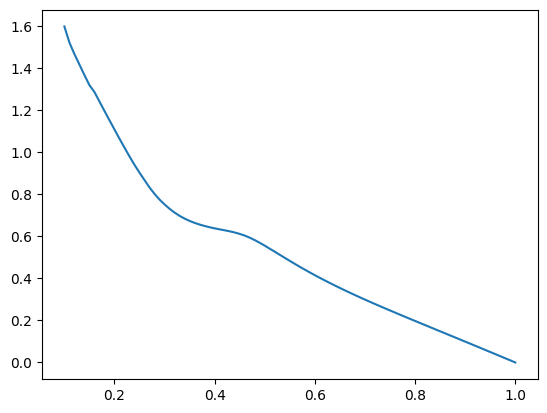

In [20]:
eng0s = np.array(eng0s)
eng1s = np.array(eng1s)
plt.plot(ss, eng1s - eng0s)


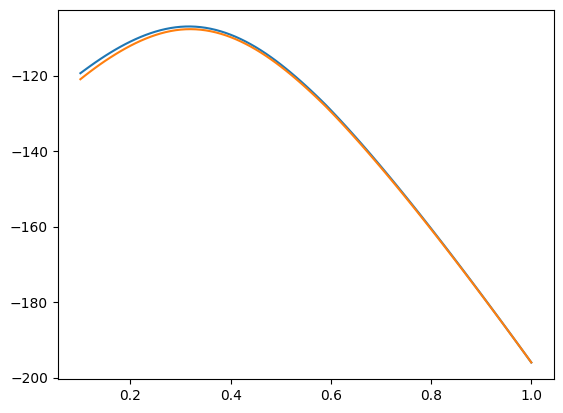

In [23]:
plt.plot(ss, eng1s)
plt.plot(ss, eng0s)



In [17]:
ss = np.linspace(0.1, 1, 91)